In [1]:
import requests as requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests as requests
from functools import reduce

In [2]:
# Get API from the WHO - estimate of global smoking prevalence (%)
url = "https://ghoapi.azureedge.net/api/M_Est_tob_curr_std?$filter=SpatialDimType%20eq%20%27GLOBAL%27"

#Use request module to get the API data:
response = requests.get(url)

#Turn response into JSON data, using the response function from the requests module:
json_data_rate = response.json()

#Check that the data has been imported and give an error message if not:
if response.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

# Create a dataframe of the relevant data:

# Set empty arrays
value = [] # For the rate
time = [] # For the year

# Loop through API data and append data to the empty arrays
for i in json_data_rate["value"]:
    if i["Dim1"] == "SEX_BTSX":
        value.append(i["NumericValue"])
        time.append(i['TimeDimensionValue'])

# Create a list of the data and for the column labels
data = list(zip(time, value))
label = ["Year","Smoking Rate"]

#Create the DataFrame
df_rate = pd.DataFrame(data, columns = label)
df_rate = df_rate.apply(pd.to_numeric, errors='coerce')
df_rate = df_rate.set_index("Year")
df_rate


Data was retrieved


,Smoking Rate
Year,
2007,28.1
2000,32.7
2030,18.1
2005,29.3
2021,21.3
2010,26.4
2022,20.9
2018,22.5
2015,23.9


In [3]:
# Get API from the WHO - measure of smoking prevelance interventions
urlM = "https://ghoapi.azureedge.net/api/M_Group"
urlP = "https://ghoapi.azureedge.net/api/P_Group"
urlO = "https://ghoapi.azureedge.net/api/O_Group"
urlW = "https://ghoapi.azureedge.net/api/W_Group"
urlE = "https://ghoapi.azureedge.net/api/E_Group"
urlR = "https://ghoapi.azureedge.net/api/R_Group"

# Get API from the WHO - measure of world population by country
urlpop = "https://ghoapi.azureedge.net/api/RS_1845"

# Use request module to get the API data:
responseM = requests.get(urlM)
responseP = requests.get(urlP)
responseO = requests.get(urlO)
responseW = requests.get(urlW)
responseE = requests.get(urlE)
responseR = requests.get(urlR)
responsepop = requests.get(urlpop)

#Turn response into JSON data, using the response function from the requests module:
json_data_M = responseM.json()
json_data_P = responseP.json()
json_data_O = responseO.json()
json_data_W = responseW.json()
json_data_E = responseE.json()
json_data_R = responseR.json()
json_data_pop = responsepop.json()

#Check that the data has been imported and give an error message if not:
if responseM.status_code == 200 & responseP.status_code == 200 & responseP.status_code == 200 & responseO.status_code == 200 & responseW.status_code == 200 & responseE.status_code == 200 & responseR.status_code == 200 & responsepop.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")


Data was retrieved


In [4]:
# Create a dataframe for population:

# Set empty arrays
indexpop = []
timepop = []
valuepop = []

# Loop through API data and append values to the empty arrays
for i in json_data_pop["value"]:
    indexpop.append(i["SpatialDim"])
    timepop.append(i["TimeDimensionValue"])
    valuepop.append(i["Value"])

# Create a list of the data in the arrays and for the columns
data = list(zip(indexpop, valuepop))
label = ["Code", "Population"]

# Create the DataFrame
df_pop = pd.DataFrame(data, columns = label)

# Clean the spaces out of the data
df_pop['Population'] = df_pop['Population'].str.replace(' ', '')
# Turn it into an integer so it can be used in a calculation
df_pop["Population"] = pd.to_numeric(df_pop["Population"])
# Set the Code column to the index
df_pop = df_pop.set_index("Code")
df_pop

,Population
Code,
ALB,3204284
SMR,31533
KGZ,5334223
UZB,27444702
BLR,9595421
...,...
CHN,1348932032
ZAF,50132820
BHS,342877


In [5]:
total_pop = sum(df_pop["Population"])
total_pop

6787737744

In [6]:
# Create a dataframe for M
indexM = []
timeM = []
valueM = []

for i in json_data_M["value"]:
    indexM.append(i["SpatialDim"])
    timeM.append(i["TimeDimensionValue"])
    valueM.append(i["Value"])

data = list(zip(indexM, valueM, timeM))

label = ["Code", "M", "Year"]
df_M = pd.DataFrame(data, columns = label)
df_M[["M"]].astype(float)
df_M_pivot = pd.DataFrame(df_M.pivot_table(values='M', index=df_M["Code"], columns='Year'))
df_columns = list(df_M.columns)
dict_M = {}
for i in df_M_pivot:
    dict_M.update({i:i+"M"})
df_M_pivot.columns = df_M_pivot.columns.to_series().map(dict_M)
df_M_pivot

Year,2007M,2008M,2010M,2012M,2014M,2016M,2018M,2020M,2022M
Code,,,,,,,,,
AFG,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
AGO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ALB,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0
AND,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
ARE,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
WSM,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0
YEM,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
ZAF,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0,2.0


In [7]:
# Create a dataframe for P
indexP = []
timeP = []
valueP = []

for i in json_data_P["value"]:
    indexP.append(i["SpatialDim"])
    timeP.append(i["TimeDimensionValue"])
    valueP.append(i["Value"])

data = list(zip(indexP, valueP, timeP))
label = ["Code", "P", "Year"]
df_P = pd.DataFrame(data, columns = label)
df_P[["P"]].astype(float)
df_P_pivot = pd.DataFrame(df_P.pivot_table(values='P', index=df_P["Code"], columns='Year'))
df_columns = list(df_P.columns)
dict_P = {}
for i in df_P_pivot:
    dict_P.update({i:i+"P"})
df_P_pivot.columns = df_P_pivot.columns.to_series().map(dict_P)
df_P_pivot

Year,2007P,2008P,2010P,2012P,2014P,2016P,2018P,2020P,2022P
Code,,,,,,,,,
AFG,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0
AGO,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
ALB,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
AND,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
ARE,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
WSM,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
YEM,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0
ZAF,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [8]:
# Create a dataframe for O
indexO = []
timeO = []
valueO = []

for i in json_data_O["value"]:
    indexO.append(i["SpatialDim"])
    timeO.append(i["TimeDimensionValue"])
    valueO.append(i["Value"])

data = list(zip(indexO, valueO, timeO))
label = ["Code", "O", "Year"]
df_O = pd.DataFrame(data, columns = label)
df_O[["O"]].astype(float)
df_O_pivot = pd.DataFrame(df_O.pivot_table(values='O', index=df_O["Code"], columns='Year'))
df_columns = list(df_O.columns)
dict_O = {}
for i in df_O_pivot:
    dict_O.update({i:i+"O"})
df_O_pivot.columns = df_O_pivot.columns.to_series().map(dict_O)
df_O_pivot

Year,2007O,2008O,2010O,2012O,2014O,2016O,2018O,2020O,2022O
Code,,,,,,,,,
AFG,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
AGO,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
ALB,2.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
AND,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
ARE,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
WSM,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
YEM,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
ZAF,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0


In [9]:
# Create a dataframe for W
indexW = []
timeW = []
valueW = []

for i in json_data_W["value"]:
    indexW.append(i["SpatialDim"])
    timeW.append(i["TimeDimensionValue"])
    valueW.append(i["Value"])

data = list(zip(indexW, valueW, timeW))
label = ["Code", "W", "Year"]
df_W = pd.DataFrame(data, columns = label)
df_W[["W"]].astype(float)
df_W_pivot = pd.DataFrame(df_W.pivot_table(values='W', index=df_W["Code"], columns='Year'))
df_columns = list(df_W.columns)
dict_W = {}
for i in df_W_pivot:
    dict_W.update({i:i+"W"})
df_W_pivot.columns = df_W_pivot.columns.to_series().map(dict_W)
df_W_pivot

Year,2007W,2008W,2010W,2012W,2014W,2016W,2018W,2020W,2022W
Code,,,,,,,,,
AFG,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0
AGO,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ALB,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
AND,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ARE,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
WSM,2.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0
YEM,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
ZAF,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [10]:
# Create a dataframe for E
indexE = []
timeE = []
valueE = []

for i in json_data_E["value"]:
    indexE.append(i["SpatialDim"])
    timeE.append(i["TimeDimensionValue"])
    valueE.append(i["Value"])

data = list(zip(indexE, valueE, timeE))
label = ["Code", "E", "Year"]
df_E = pd.DataFrame(data, columns = label)
df_E[["E"]].astype(float)
df_E_pivot = pd.DataFrame(df_E.pivot_table(values='E', index=df_E["Code"], columns='Year'))
df_columns = list(df_E.columns)
dict_E = {}
for i in df_E_pivot:
    dict_E.update({i:i+"E"})
df_E_pivot.columns = df_E_pivot.columns.to_series().map(dict_E)
df_E_pivot

Year,2007E,2008E,2010E,2012E,2014E,2016E,2018E,2020E,2022E
Code,,,,,,,,,
AFG,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0
AGO,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0
ALB,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
AND,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ARE,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
WSM,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
YEM,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
ZAF,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [11]:
# Create a dataframe for R
indexR = []
timeR = []
valueR = []

for i in json_data_R["value"]:
    indexR.append(i["SpatialDim"])
    timeR.append(i["TimeDimensionValue"])
    valueR.append(i["Value"])

data = list(zip(indexR, valueR, timeR))
label = ["Code", "R", "Year"]
df_R = pd.DataFrame(data, columns = label)
df_R = df_R.replace("Not applicable", 0)
df_R[["R"]].astype(float)
df_R_pivot = pd.DataFrame(df_R.pivot_table(values='R', index=df_R["Code"], columns='Year'))
df_columns = list(df_R.columns)
dict_R = {}
for i in df_R_pivot:
    dict_R.update({i:i+"R"})
df_R_pivot.columns = df_R_pivot.columns.to_series().map(dict_R)
df_R_pivot

Year,2007R,2008R,2010R,2012R,2014R,2016R,2018R,2020R,2022R
Code,,,,,,,,,
AFG,0.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0
AGO,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
ALB,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
AND,0.0,1.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0
ARE,0.0,3.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
WSM,0.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0
YEM,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
ZAF,0.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0


In [12]:
# Merge data into a combined DataFrame
data_frames = [df_pop, df_M_pivot, df_P_pivot, df_O_pivot, df_W_pivot, df_E_pivot, df_R_pivot]
merged_data_frames = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, left_index=True, right_index=True, how='outer'), data_frames)

# Create total columns for each of the years
merged_data_frames["TOTAL MPOWER 2022 Weighted"] = (merged_data_frames["2022M"] + merged_data_frames["2022P"] + merged_data_frames["2022O"] + merged_data_frames["2022W"] + merged_data_frames["2022E"] + merged_data_frames["2022R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2020 Weighted"] = (merged_data_frames["2020M"] + merged_data_frames["2020P"] + merged_data_frames["2020O"] + merged_data_frames["2020W"] + merged_data_frames["2020E"] + merged_data_frames["2020R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2018 Weighted"] = (merged_data_frames["2018M"] + merged_data_frames["2018P"] + merged_data_frames["2018O"] + merged_data_frames["2018W"] + merged_data_frames["2018E"] + merged_data_frames["2018R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2016 Weighted"] = (merged_data_frames["2016M"] + merged_data_frames["2016P"] + merged_data_frames["2016O"] + merged_data_frames["2016W"] + merged_data_frames["2016E"] + merged_data_frames["2016R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2014 Weighted"] = (merged_data_frames["2014M"] + merged_data_frames["2014P"] + merged_data_frames["2014O"] + merged_data_frames["2014W"] + merged_data_frames["2014E"] + merged_data_frames["2014R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2012 Weighted"] = (merged_data_frames["2012M"] + merged_data_frames["2012P"] + merged_data_frames["2012O"] + merged_data_frames["2012W"] + merged_data_frames["2012E"] + merged_data_frames["2012R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2010 Weighted"] = (merged_data_frames["2010M"] + merged_data_frames["2010P"] + merged_data_frames["2010O"] + merged_data_frames["2010W"] + merged_data_frames["2010E"] + merged_data_frames["2010R"])*merged_data_frames['Population']
merged_data_frames["TOTAL MPOWER 2008 Weighted"] = (merged_data_frames["2008M"] + merged_data_frames["2008P"] + merged_data_frames["2008O"] + merged_data_frames["2008W"] + merged_data_frames["2008E"] + merged_data_frames["2008R"])*merged_data_frames['Population']

# Create a dataframe with just the totals in
total_MPOWER = merged_data_frames[["TOTAL MPOWER 2022 Weighted", "TOTAL MPOWER 2020 Weighted","TOTAL MPOWER 2018 Weighted","TOTAL MPOWER 2016 Weighted","TOTAL MPOWER 2014 Weighted","TOTAL MPOWER 2012 Weighted","TOTAL MPOWER 2010 Weighted", "TOTAL MPOWER 2008 Weighted"]].copy()
total_MPOWER


,TOTAL MPOWER 2022 Weighted,TOTAL MPOWER 2020 Weighted,TOTAL MPOWER 2018 Weighted,TOTAL MPOWER 2016 Weighted,TOTAL MPOWER 2014 Weighted,TOTAL MPOWER 2012 Weighted,TOTAL MPOWER 2010 Weighted,TOTAL MPOWER 2008 Weighted
Code,,,,,,,,
AFG,565411356.0,596823098.0,596823098.0,659646582.0,533999614.0,471176130.0,471176130.0,471176130.0
AGO,305310592.0,305310592.0,305310592.0,228982944.0,248064856.0,248064856.0,228982944.0,228982944.0
ALB,80107100.0,80107100.0,76902816.0,76902816.0,76902816.0,80107100.0,76902816.0,76902816.0
AND,1527570.0,1527570.0,1527570.0,1442705.0,1442705.0,1442705.0,1272975.0,1018380.0
ARE,172768870.0,180280560.0,180280560.0,157745490.0,165257180.0,165257180.0,150233800.0,142722110.0
...,...,...,...,...,...,...,...,...
WSM,4027782.0,4027782.0,4210863.0,4393944.0,4210863.0,3661620.0,3661620.0,3661620.0
YEM,481050280.0,505102794.0,529155308.0,529155308.0,529155308.0,456997766.0,432945252.0,456997766.0
ZAF,902390760.0,852257940.0,852257940.0,952523580.0,952523580.0,902390760.0,902390760.0,852257940.0


In [13]:
# Add up each column in the table
data = [(merged_data_frames["TOTAL MPOWER 2008 Weighted"]).sum(), (merged_data_frames["TOTAL MPOWER 2010 Weighted"]).sum(), (merged_data_frames["TOTAL MPOWER 2012 Weighted"]).sum(), (merged_data_frames["TOTAL MPOWER 2014 Weighted"].sum()), (merged_data_frames["TOTAL MPOWER 2016 Weighted"].sum()), (merged_data_frames["TOTAL MPOWER 2018 Weighted"].sum()), (merged_data_frames["TOTAL MPOWER 2020 Weighted"].sum()), (merged_data_frames["TOTAL MPOWER 2022 Weighted"].sum())]

# Create a DataFrame to calculated the weighted mean
total_MPOWER_mean = pd.DataFrame(data, index = [2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022],columns = ["Total"])
total_MPOWER_mean.index = total_MPOWER_mean.index.astype(int)
total_MPOWER_mean.index.name = "Year"
total_MPOWER_mean["Weighted Mean"] = total_MPOWER_mean["Total"]/total_pop
total_MPOWER_mean

,Total,Weighted Mean
Year,,
2008,1.276915e+11,18.812078
2010,1.292451e+11,19.040970
2012,1.348978e+11,19.873743
2014,1.418665e+11,20.900409
2016,1.489669e+11,21.946476
2018,1.527034e+11,22.496951
2020,1.539968e+11,22.687495
2022,1.546437e+11,22.782809


In [14]:
# Merge weighted mean with smoking rate
merged_rate_MPOWER = pd.merge(total_MPOWER_mean, df_rate, left_index=True, right_index=True, how='outer')
merged_rate_MPOWER
cleaned_merged_rate_MPOWER = merged_rate_MPOWER.drop([2000, 2005, 2025, 2030])
cleaned_merged_rate_MPOWER

,Total,Weighted Mean,Smoking Rate
Year,,,
2007,NaN,NaN,28.1
2008,1.276915e+11,18.812078,NaN
2010,1.292451e+11,19.040970,26.4
2012,1.348978e+11,19.873743,NaN
2014,1.418665e+11,20.900409,NaN
2015,NaN,NaN,23.9
2016,1.489669e+11,21.946476,NaN
2018,1.527034e+11,22.496951,22.5
2020,1.539968e+11,22.687495,21.7


## CHECK CORRELATION

In [15]:
# Check the correlation
print(merged_rate_MPOWER.corr())

                  Total  Weighted Mean  Smoking Rate
Total          1.000000       1.000000     -0.978652
Weighted Mean  1.000000       1.000000     -0.978652
Smoking Rate  -0.978652      -0.978652      1.000000


## CREATE A PLOT

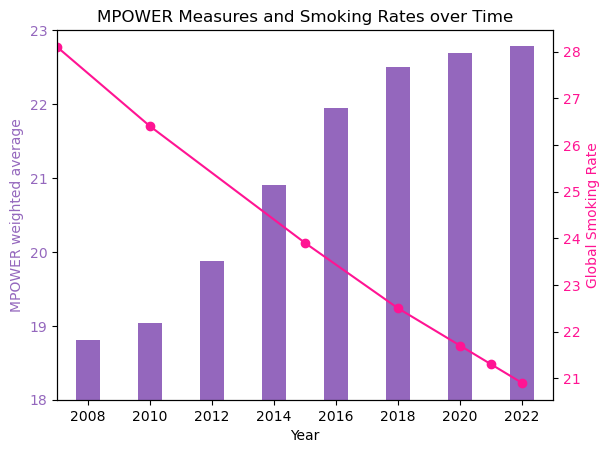

In [22]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
 
# Create a mask to smooth the smoking rate data into a line
ratemask = np.isfinite(cleaned_merged_rate_MPOWER["Smoking Rate"])

# Create the plot and set the axis values
fig, ax1 = plt.subplots()
plt.xlim(2007, 2023)
plt.ylim(18, 23)
 
# Plot the MPOWER values
ax1.set_xlabel('Year')
ax1.set_ylabel('MPOWER weighted average', color = 'tab:purple') 
ax1.bar(cleaned_merged_rate_MPOWER.index.tolist(), cleaned_merged_rate_MPOWER["Weighted Mean"], color = 'tab:purple') 
ax1.tick_params(axis ='y', labelcolor = 'tab:purple') 
 
# Adding Twin Axes to plot smoking rates
ax2 = ax1.twinx() 
ax2.set_ylabel('Global Smoking Rate', color = "deeppink") 
ax2.plot(cleaned_merged_rate_MPOWER["Smoking Rate"][ratemask], linestyle='-', marker='o', color = "deeppink") 
ax2.tick_params(axis ='y', labelcolor = "deeppink") 
 
# Adding title
plt.title('MPOWER Measures and Smoking Rates over Time') 
 
# Show plot
plt.show()